In [7]:
import streamlit as st
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Title
st.title("FX Volatility Heatmap Dashboard")

# FX pairs dictionary
pairs = {
    "EURUSD=X": "EUR/USD",
    "USDJPY=X": "USD/JPY",
    "GBPUSD=X": "GBP/USD",
    "AUDUSD=X": "AUD/USD",
    "USDCAD=X": "USD/CAD",
    "USDCHF=X": "USD/CHF",
    "NZDUSD=X": "NZD/USD"
}

# Date input widgets
start_date = st.date_input("Start date", pd.to_datetime("2024-01-01"))
end_date = st.date_input("End date", pd.to_datetime("today"))

# Window size selector for rolling volatility
window_size = st.slider("Volatility Window (days)", min_value=5, max_value=60, value=7)


2025-07-07 10:04:44.196 
  command:

    streamlit run E:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


2025-07-07 10:06:34.326 No runtime found, using MemoryCacheStorageManager
2025-07-07 10:06:34.328 No runtime found, using MemoryCacheStorageManager
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DeltaGenerator()

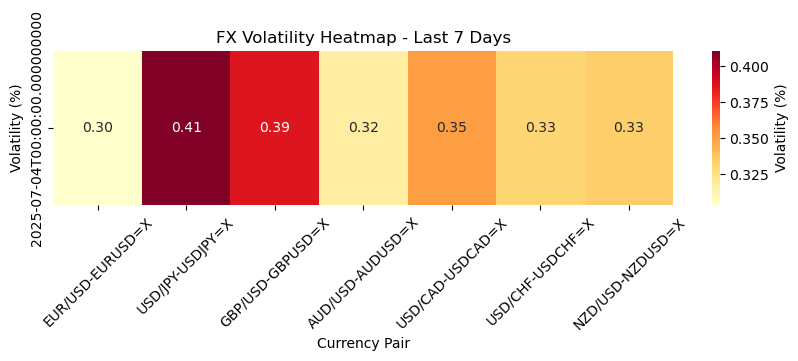

In [11]:

@st.cache_data
def load_data(start, end):
    data = {}
    for symbol in pairs:
        df = yf.download(symbol, start=start, end=end, auto_adjust=True)['Close']
        if df is not None and hasattr(df, 'shape') and df.shape[0] > 0:
            data[pairs[symbol]] = df
        else:
            print(f"Warning: No data or empty for {pairs[symbol]} ({symbol})")

    aligned_df = pd.concat(data.values(), axis=1, keys=data.keys())
    return aligned_df.dropna()

fx_df = load_data(start_date, end_date)

returns = fx_df.pct_change()

volatility = returns.rolling(window=window_size).std().iloc[-1] * 100  # %

# Prepare DataFrame for heatmap (just one row here)
vol_df = pd.DataFrame(volatility).T

# Plot heatmap using seaborn + matplotlib
fig, ax = plt.subplots(figsize=(10, 2))
sns.heatmap(vol_df, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Volatility (%)'}, ax=ax)
ax.set_xlabel("Currency Pair")
ax.set_ylabel("Volatility (%)")
plt.xticks(rotation=45)
plt.title(f"FX Volatility Heatmap - Last {window_size} Days")
st.pyplot(fig)